# Demo 10: FISTA

This demo shows how to make use of FISTA, another algorithm that makes use of a tvminimisation step but also converges quadratically, almost as fast as cgls.

## Define geometry

In [1]:
import tigre
import numpy as np
geo = tigre.geometry(mode='cone',default=True,high_quality=False)
print(geo)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1536 mm
Distance from source to origin (DSO)= 1000 mm
-----
Detector parameters
Number of pixels (nDetector) = [128 128]
Size of each pixel (dDetector) = [3.2 3.2] mm
Total size of the detector (sDetector) = [409.6 409.6] mm
-----
Image parameters
Number of voxels (nVoxel) = [64 64 64]
Total size of the image (sVoxel) = [256 256 256] mm
Size of each voxel (dVoxel) = [4. 4. 4.] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


## Set up data

In [2]:
from tigre.demos.Test_data import data_loader
angles = np.linspace(0,2*np.pi,100)
head = data_loader.load_head_phantom(geo.nVoxel)
proj = tigre.Ax(head,geo,angles)

## Lets set up CGLS and OSSART for comparison

In [3]:
import tigre.algorithms as algs
imgCGLS = algs.cgls(proj,geo,angles,niter=20)
imgOSSART = algs.ossart(proj,geo,angles,niter=20)


CGLS Algorithm in progress.
Esitmated time until completetion (s): 9.700507
Average time taken for each iteration for CGLS:0.15033015(s)
OSSART algorithm in progress.
Esitmated time until completetion (s): 11.98729


## FISTA

In [4]:
# Of utmost importance to FISTA is the convergence constant, defined as the lipschitz
# constant of the linear system Ax. In the algorithm it can be passed as the key word 
# 'hyper'

#     :keyword hyper: (np.float64)
#         hyper parameter proportional to the largest eigenvalue of the
#         matrix A in the equations Ax-b and ATb.
#         Empirical tests show, for the headphantom object:

#         nVoxel = np.array([64,64,64]),      hyper (approx=) 2.e6
#         nVoxel = np.array([512,512,512]),   hyper (approx=) 2.e4

# from tigre.utilities.power_method import svd_power_method

imgFISTA = algs.fista(proj,geo,angles,niter=75,hyper = 2.e6)

# tweeking the tv parameters for the algorithm 

imgFISTA_hightv = algs.fista(proj,geo,angles,niter=75,hyper=2.e6,tviter=100,tvlambda=10)


FISTA algorithm in progress.
Esitmated time until completetion (s): 13.830748
FISTA algorithm in progress.
Esitmated time until completetion (s): 15.645154


## Plot results

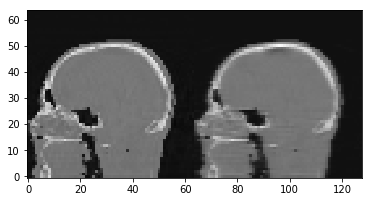

<tigre.utilities.plotimg.plotimg instance at 0x7f69325157a0>

In [5]:
tigre.plotimg(np.hstack((imgCGLS,imgOSSART)),slice=32)

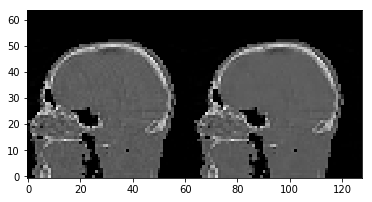

<tigre.utilities.plotimg.plotimg instance at 0x7f6968a56368>

In [6]:
tigre.plotimg(np.hstack((imgFISTA,imgFISTA_hightv)),slice=32)